<a href="https://colab.research.google.com/github/wagiham/Activist-Toolkit/blob/main/ling2220_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Speech segments >600ms: 0.9058380414312618
Silence segments >200ms: 0.7124060150375939


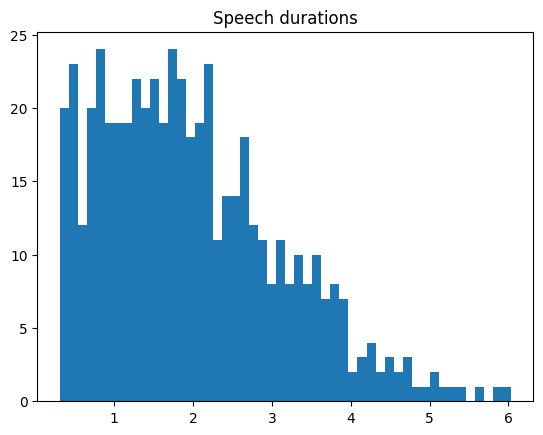

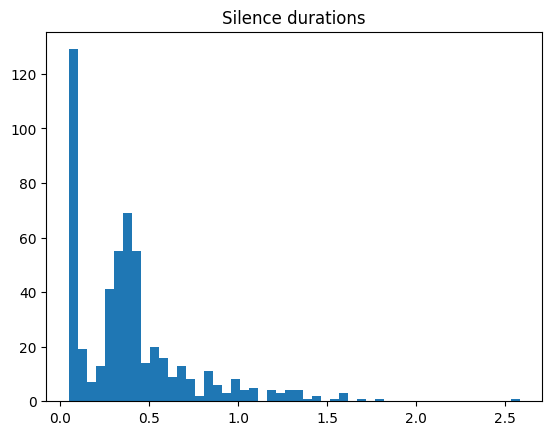

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load one file
data = np.loadtxt("Version1_1.lab", dtype=str)

start = data[:,0].astype(float)
end = data[:,1].astype(float)
labels = data[:,2]

durations = end - start

speech = durations[labels == "speech"]
silence = durations[labels == "nonspeech"]

print("Speech segments >600ms:", np.mean(speech > 0.6))
print("Silence segments >200ms:", np.mean(silence > 0.2))

plt.hist(speech, bins=50)
plt.title("Speech durations")
plt.show()

plt.hist(silence, bins=50)
plt.title("Silence durations")
plt.show()


In [ ]:
import glob
import numpy as np

files = sorted(glob.glob("Version*_*.lab"))

results = []

for file in files:
    data = np.loadtxt(file, dtype=str)

    start = data[:,0].astype(float)
    end = data[:,1].astype(float)
    labels = data[:,2]

    durations = end - start

    speech = durations[labels == "speech"]
    silence = durations[labels == "nonspeech"]

    speech_prop = np.mean(speech > 0.6)
    silence_prop = np.mean(silence > 0.2)

    results.append((file, speech_prop, silence_prop))

for r in results:
    print(r)


('Version1_1.lab', np.float64(0.9058380414312618), np.float64(0.7124060150375939))


In [ ]:
# === Cell 1: Imports + robust file discovery + debug ===
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

DATA_DIR = "sample_data"  # folder shown in your left panel

print("CWD:", os.getcwd())
print("DATA_DIR exists?", os.path.exists(DATA_DIR))
if os.path.exists(DATA_DIR):
    print("Files in DATA_DIR (first 10):", os.listdir(DATA_DIR)[:10])

# Primary (expected) patterns
lab_files = sorted(glob.glob(os.path.join(DATA_DIR, "Version*_*.lab")))
word_files = sorted(glob.glob(os.path.join(DATA_DIR, "Version*_*.words")))

# Fallback: search anywhere under current folder (in case DATA_DIR mismatch)
if len(lab_files) == 0:
    lab_files = sorted(glob.glob("**/Version*_*.lab", recursive=True))
if len(word_files) == 0:
    word_files = sorted(glob.glob("**/Version*_*.words", recursive=True))

print("LAB files found:", len(lab_files))
print("WORDS files found:", len(word_files))
print("Example LAB:", lab_files[0] if lab_files else None)
print("Example WORDS:", word_files[0] if word_files else None)

CWD: /content
DATA_DIR exists? True
Files in DATA_DIR (first 10): ['anscombe.json', 'README.md', 'mnist_test.csv', 'california_housing_train.csv', 'california_housing_test.csv', 'mnist_train_small.csv']
LAB files found: 14
WORDS files found: 0
Example LAB: Version1_1.lab
Example WORDS: None


In [ ]:
# === Cell 2: Helpers to parse version/chapter from filename ===
def parse_version_chapter(path):
    # works for .../Version7_2.lab etc
    base = os.path.basename(path)
    m = re.match(r"Version(\d+)_(\d+)\.(lab|words)$", base)
    if not m:
        return None, None
    return int(m.group(1)), int(m.group(2))

In [ ]:
# === Cell 3: Load a .lab file (speech vs nonspeech) ===
def load_lab(path):
    """
    Returns:
      start (N,), end (N,), labels (N,), durations (N,)
      speech_durations, silence_durations
    """
    data = np.loadtxt(path, dtype=str)

    start = data[:, 0].astype(float)
    end = data[:, 1].astype(float)
    labels = data[:, 2]

    durations = end - start

    speech = durations[labels == "speech"]
    silence = durations[labels == "nonspeech"]  # based on your files

    return start, end, labels, durations, speech, silence

In [ ]:
# === Cell 4: Build the core results table (thresholds + stats) ===
rows = []

if len(lab_files) == 0:
    raise FileNotFoundError(
        "No .lab files found. Check DATA_DIR name, CWD, and that files are inside the folder."
    )

for f in lab_files:
    v, ch = parse_version_chapter(f)
    start, end, labels, durations, speech, silence = load_lab(f)

    rows.append({
        "file": os.path.basename(f),
        "version": v,
        "chapter": ch,

        "n_segments": len(durations),
        "n_speech": len(speech),
        "n_silence": len(silence),

        "speech_mean_s": float(np.mean(speech)) if len(speech) else np.nan,
        "speech_median_s": float(np.median(speech)) if len(speech) else np.nan,
        "speech_p90_s": float(np.percentile(speech, 90)) if len(speech) else np.nan,

        "silence_mean_s": float(np.mean(silence)) if len(silence) else np.nan,
        "silence_median_s": float(np.median(silence)) if len(silence) else np.nan,
        "silence_p90_s": float(np.percentile(silence, 90)) if len(silence) else np.nan,

        # thresholds from assignment
        "pct_speech_gt_600ms": float(np.mean(speech > 0.6)) if len(speech) else np.nan,
        "pct_silence_gt_200ms": float(np.mean(silence > 0.2)) if len(silence) else np.nan,
    })

df = pd.DataFrame(rows).sort_values(["chapter", "version"]).reset_index(drop=True)
df

,file,version,chapter,n_segments,n_speech,n_silence,speech_mean_s,speech_median_s,speech_p90_s,silence_mean_s,silence_median_s,silence_p90_s,pct_speech_gt_600ms,pct_silence_gt_200ms
0,Version1_1.lab,1,1,1063,531,532,1.988889,1.82,3.610,0.401955,0.360,0.840,0.905838,0.712406
1,Version2_1.lab,2,1,1191,595,596,1.366420,1.17,2.540,0.372215,0.340,0.785,0.823529,0.614094
2,Version3_1.lab,3,1,1071,535,536,1.689402,1.54,2.946,0.421549,0.370,0.820,0.882243,0.727612
3,Version4_1.lab,4,1,1001,500,501,1.772720,1.60,3.152,0.494371,0.410,1.010,0.912000,0.756487
4,Version5_1.lab,5,1,1055,527,528,1.682448,1.57,2.874,0.549242,0.460,1.146,0.907021,0.795455
5,Version6_1.lab,6,1,1117,558,559,1.510305,1.38,2.583,0.475385,0.440,0.950,0.908602,0.731664
6,Version7_1.lab,7,1,1015,507,508,1.865819,1.63,3.354,0.481161,0.385,1.070,0.927022,0.712598
7,Version1_2.lab,1,2,539,269,270,2.194461,1.89,4.282,0.379259,0.340,0.802,0.903346,0.700000
8,Version2_2.lab,2,2,543,271,272,1.647749,1.40,3.070,0.384265,0.350,0.830,0.819188,0.625000
9,Version3_2.lab,3,2,503,251,252,1.931116,1.78,3.500,0.363571,0.320,0.689,0.888446,0.710317


In [ ]:
# === Cell B: Save your results table (so you can submit / reuse) ===
import os
os.makedirs("tables", exist_ok=True)
df.to_csv("tables/lab_summary_thresholds.csv", index=False)
print("Saved: tables/lab_summary_thresholds.csv")

Saved: tables/lab_summary_thresholds.csv


In [ ]:
# === Cell C: Rank readers by long silences (per chapter) ===
for ch in sorted(df["chapter"].unique()):
    print(f"\n=== Chapter {ch}: ranked by pct_silence_gt_200ms (descending) ===")
    display(
        df[df["chapter"] == ch][
            ["version","file","pct_silence_gt_200ms","silence_mean_s","silence_p90_s",
             "pct_speech_gt_600ms","speech_mean_s","speech_p90_s"]
        ].sort_values("pct_silence_gt_200ms", ascending=False).reset_index(drop=True)
    )


=== Chapter 1: ranked by pct_silence_gt_200ms (descending) ===


,version,file,pct_silence_gt_200ms,silence_mean_s,silence_p90_s,pct_speech_gt_600ms,speech_mean_s,speech_p90_s
0,5,Version5_1.lab,0.795455,0.549242,1.146,0.907021,1.682448,2.874
1,4,Version4_1.lab,0.756487,0.494371,1.010,0.912000,1.772720,3.152
2,6,Version6_1.lab,0.731664,0.475385,0.950,0.908602,1.510305,2.583
3,3,Version3_1.lab,0.727612,0.421549,0.820,0.882243,1.689402,2.946
4,7,Version7_1.lab,0.712598,0.481161,1.070,0.927022,1.865819,3.354
5,1,Version1_1.lab,0.712406,0.401955,0.840,0.905838,1.988889,3.610
6,2,Version2_1.lab,0.614094,0.372215,0.785,0.823529,1.366420,2.540



=== Chapter 2: ranked by pct_silence_gt_200ms (descending) ===


,version,file,pct_silence_gt_200ms,silence_mean_s,silence_p90_s,pct_speech_gt_600ms,speech_mean_s,speech_p90_s
0,5,Version5_2.lab,0.784722,0.550660,1.153,0.923345,1.712056,2.904
1,4,Version4_2.lab,0.780303,0.514432,1.097,0.935361,1.856692,3.424
2,7,Version7_2.lab,0.719844,0.467704,0.994,0.949219,1.975156,3.530
3,3,Version3_2.lab,0.710317,0.363571,0.689,0.888446,1.931116,3.500
4,1,Version1_2.lab,0.700000,0.379259,0.802,0.903346,2.194461,4.282
5,6,Version6_2.lab,0.664452,0.431761,0.940,0.896667,1.545767,2.666
6,2,Version2_2.lab,0.625000,0.384265,0.830,0.819188,1.647749,3.070


In [ ]:
# === Fix paths: map df["file"] to actual full path on disk ===
import os

# This assumes you already have lab_files (full paths) from your earlier discovery cell.
# If you don't, recreate it like:
# lab_files = sorted(glob.glob("**/Version*_*.lab", recursive=True))

lab_path_map = {os.path.basename(p): p for p in lab_files}

# sanity check
missing = [f for f in df["file"].unique() if f not in lab_path_map]
print("Missing from map:", missing[:5], "count:", len(missing))

print("Example mapping:", list(lab_path_map.items())[:2])

Missing from map: [] count: 0
Example mapping: [('Version1_1.lab', 'Version1_1.lab'), ('Version1_2.lab', 'Version1_2.lab')]


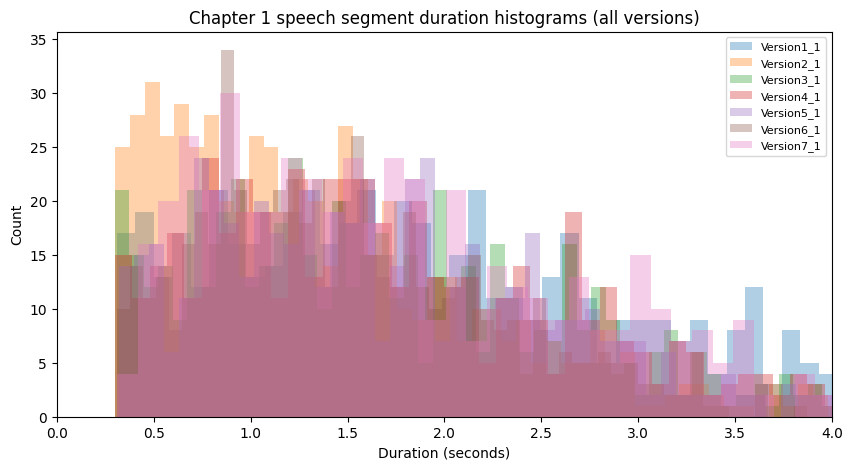

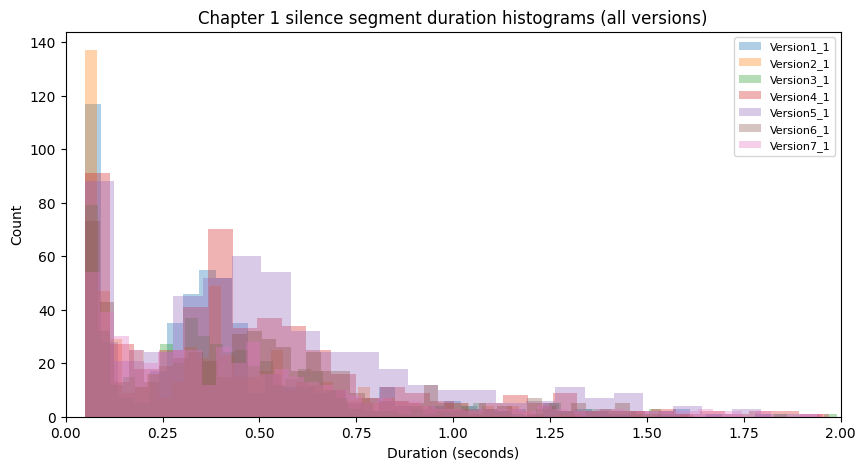

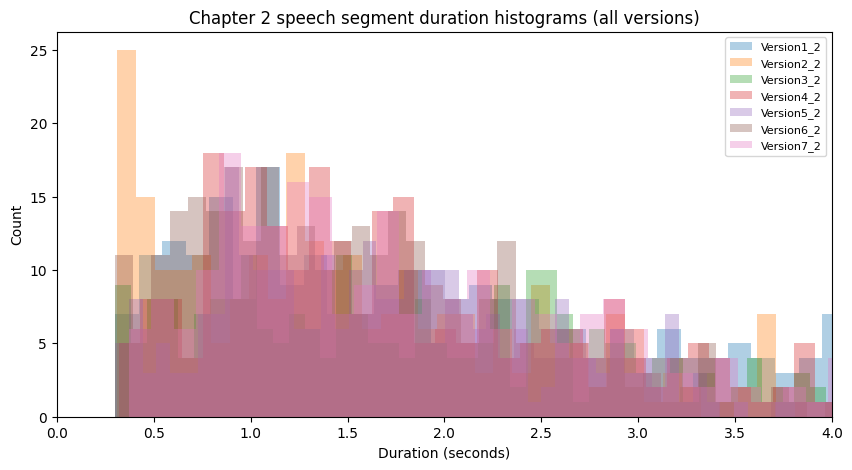

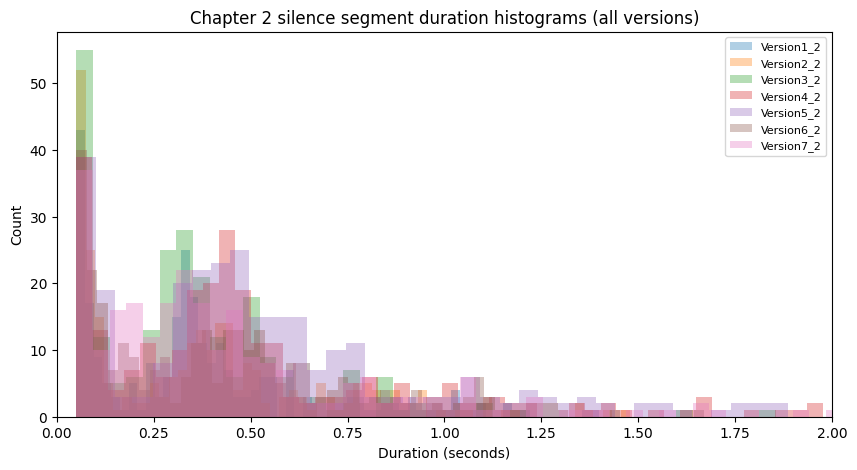

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms_for_chapter(chapter, kind="speech", bins=60, xlim=None):
    files = df[df["chapter"] == chapter].sort_values("version")["file"].tolist()

    plt.figure(figsize=(10, 5))
    for fname in files:
        path = lab_path_map[fname]  # <- full correct path
        _, _, labels, durations, speech, silence = load_lab(path)
        arr = speech if kind == "speech" else silence
        plt.hist(arr, bins=bins, alpha=0.35, label=fname.replace(".lab",""))

    plt.title(f"Chapter {chapter} {kind} segment duration histograms (all versions)")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Count")
    if xlim is not None:
        plt.xlim(xlim)
    plt.legend(fontsize=8)
    plt.show()

plot_histograms_for_chapter(1, kind="speech", bins=60, xlim=(0, 4))
plot_histograms_for_chapter(1, kind="silence", bins=60, xlim=(0, 2))
plot_histograms_for_chapter(2, kind="speech", bins=60, xlim=(0, 4))
plot_histograms_for_chapter(2, kind="silence", bins=60, xlim=(0, 2))

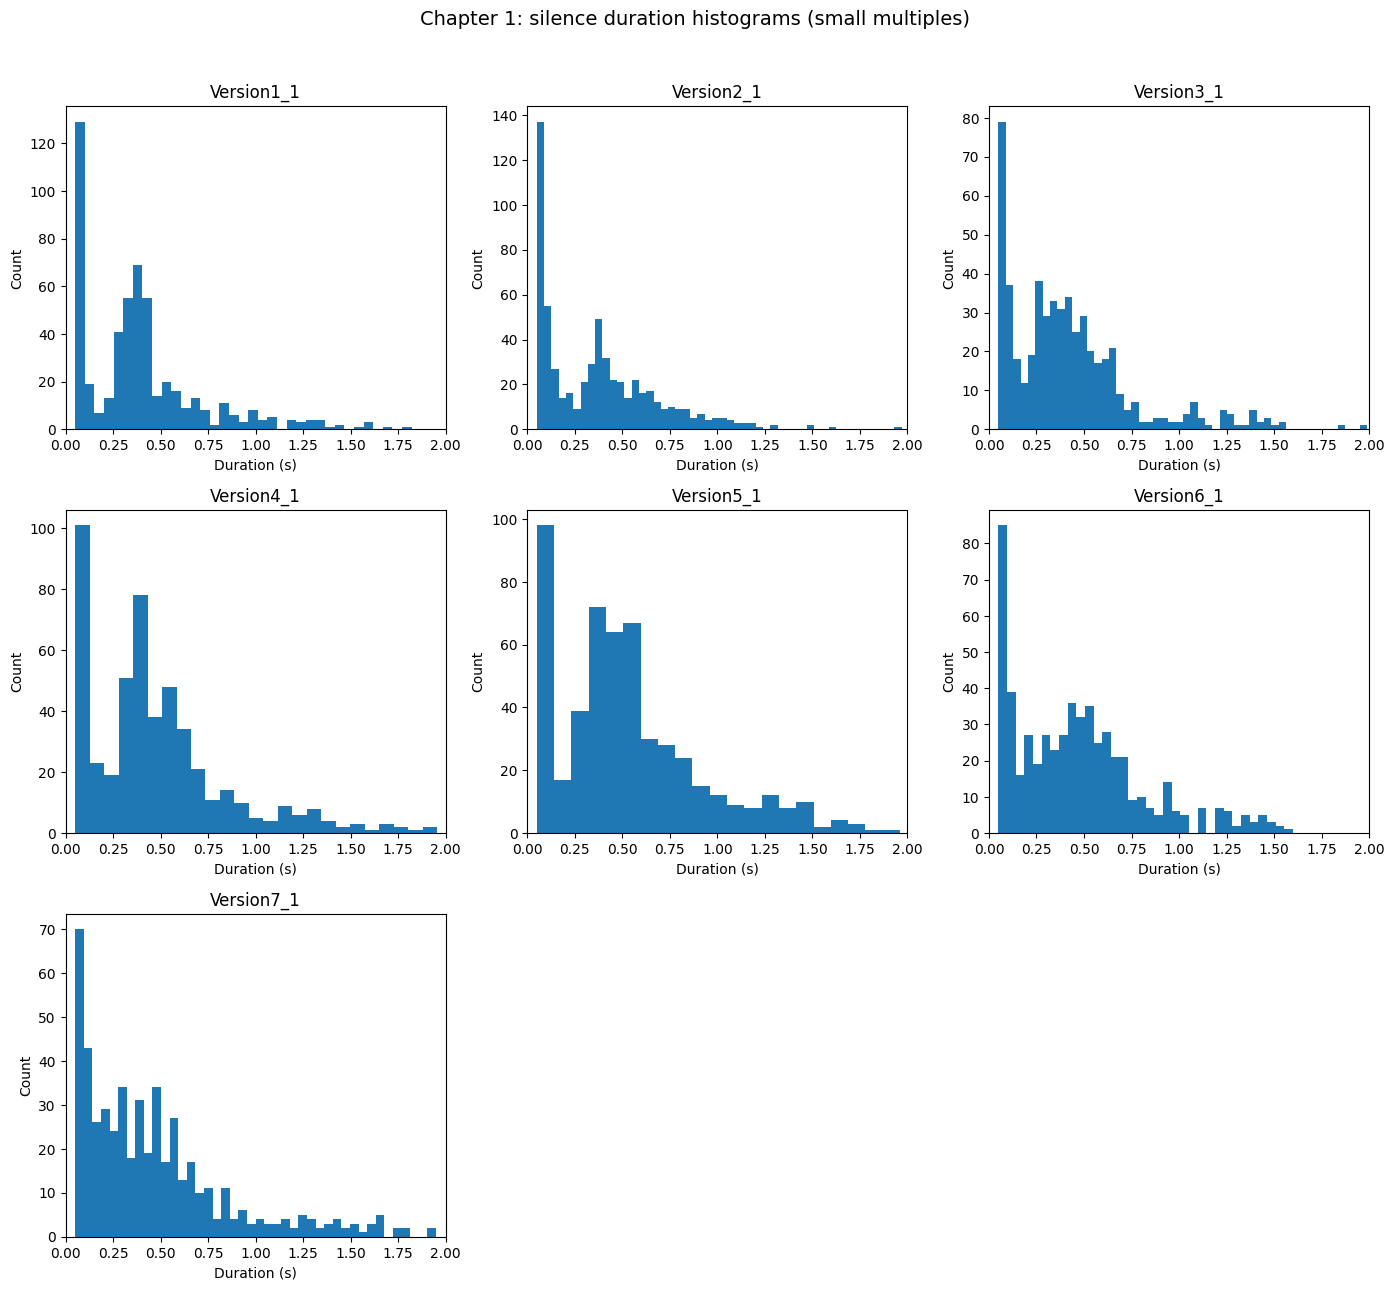

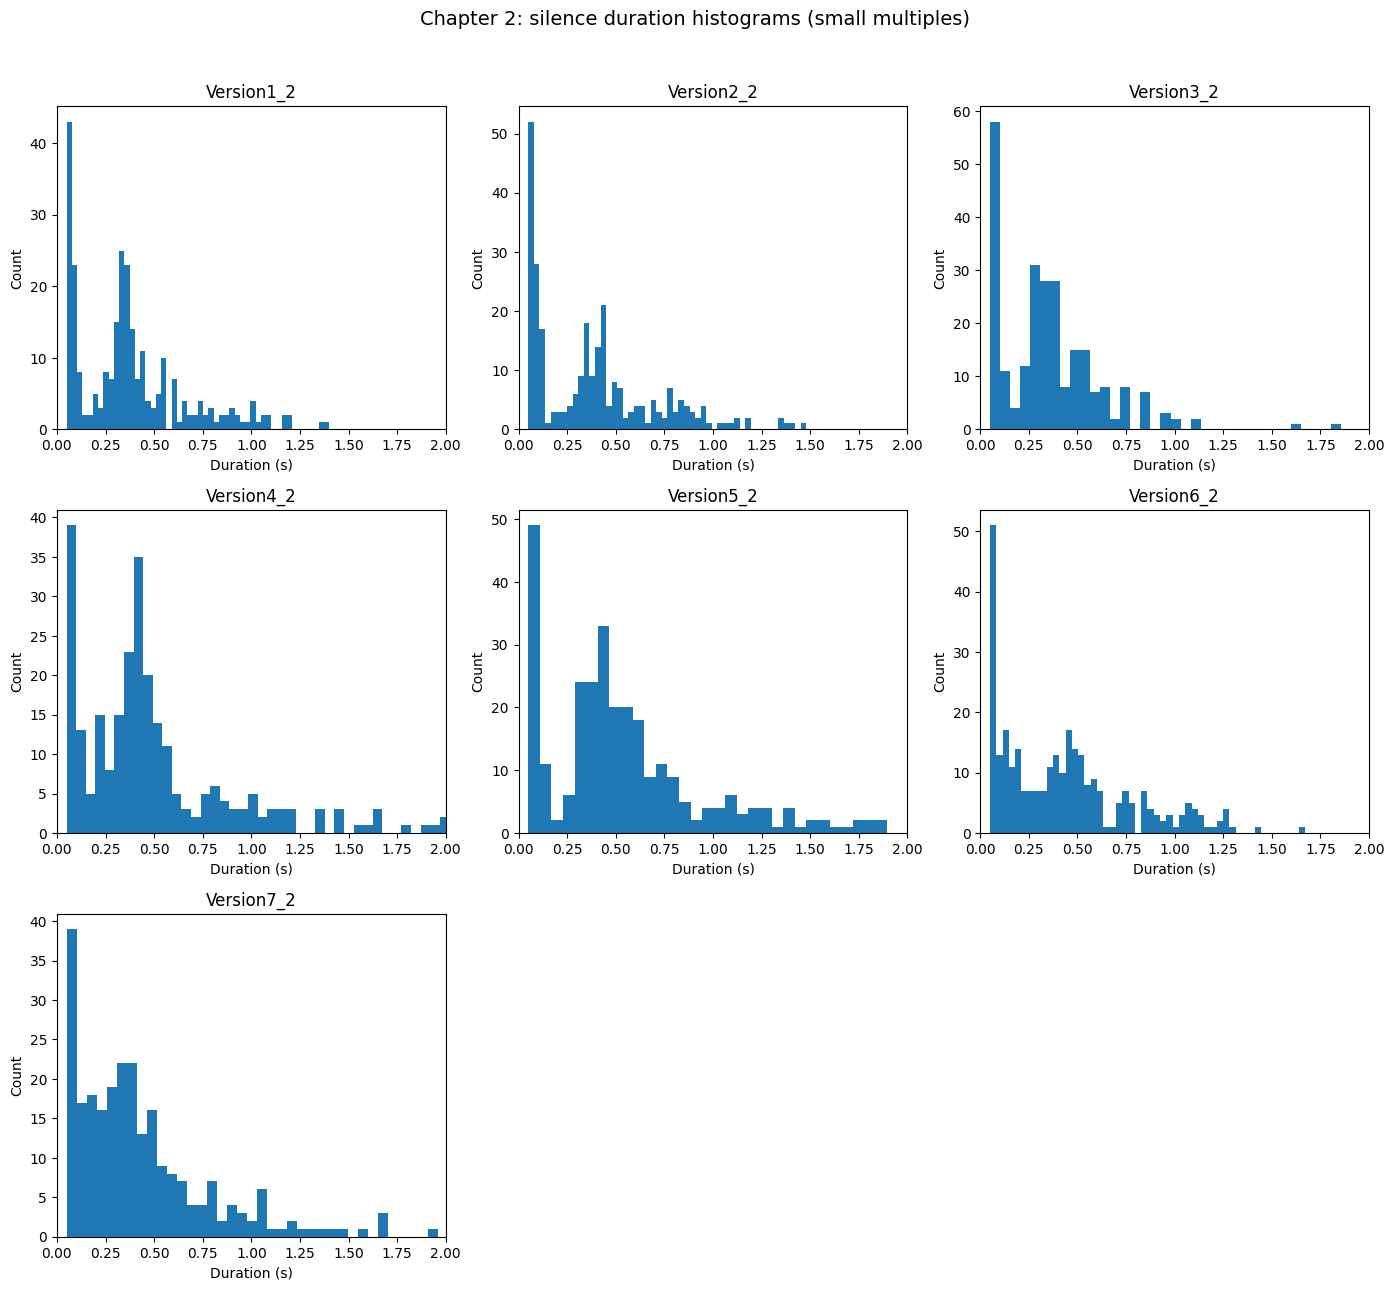

In [ ]:
# === Cell 1: Small-multiple histograms (one subplot per version) ===
import math
import matplotlib.pyplot as plt

def small_multiple_hists(chapter, kind="silence", bins=50, xlim=None):
    sub = df[df["chapter"] == chapter].sort_values("version")
    files = sub["file"].tolist()
    n = len(files)

    ncols = 3
    nrows = math.ceil(n / ncols)

    plt.figure(figsize=(14, 4.2 * nrows))
    for i, fname in enumerate(files, start=1):
        path = lab_path_map[fname]  # uses the correct full path map
        _, _, labels, durations, speech, silence = load_lab(path)
        arr = speech if kind == "speech" else silence

        ax = plt.subplot(nrows, ncols, i)
        ax.hist(arr, bins=bins)
        ax.set_title(fname.replace(".lab", ""))
        ax.set_xlabel("Duration (s)")
        ax.set_ylabel("Count")
        if xlim is not None:
            ax.set_xlim(xlim)

    plt.suptitle(f"Chapter {chapter}: {kind} duration histograms (small multiples)", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

small_multiple_hists(1, kind="silence", bins=50, xlim=(0, 2))
small_multiple_hists(2, kind="silence", bins=50, xlim=(0, 2))

In [18]:
# === Cell 5: Merge and save final combined table ===
df_final = df.merge(seq_df, on=["file","version","chapter"], how="left")
df_final.to_csv("tables/final_lab_results_with_sequence.csv", index=False)
df_final

,file,version,chapter,n_segments,n_speech,n_silence,speech_mean_s,speech_median_s,speech_p90_s,silence_mean_s,silence_median_s,silence_p90_s,pct_speech_gt_600ms,pct_silence_gt_200ms,silence_lag1_corr,speech_lag1_corr
0,Version1_1.lab,1,1,1063,531,532,1.988889,1.82,3.610,0.401955,0.360,0.840,0.905838,0.712406,-0.172558,0.045767
1,Version2_1.lab,2,1,1191,595,596,1.366420,1.17,2.540,0.372215,0.340,0.785,0.823529,0.614094,-0.206568,0.052253
2,Version3_1.lab,3,1,1071,535,536,1.689402,1.54,2.946,0.421549,0.370,0.820,0.882243,0.727612,-0.077691,0.104829
3,Version4_1.lab,4,1,1001,500,501,1.772720,1.60,3.152,0.494371,0.410,1.010,0.912000,0.756487,-0.132204,0.058171
4,Version5_1.lab,5,1,1055,527,528,1.682448,1.57,2.874,0.549242,0.460,1.146,0.907021,0.795455,-0.156247,0.124448
5,Version6_1.lab,6,1,1117,558,559,1.510305,1.38,2.583,0.475385,0.440,0.950,0.908602,0.731664,-0.167036,0.069255
6,Version7_1.lab,7,1,1015,507,508,1.865819,1.63,3.354,0.481161,0.385,1.070,0.927022,0.712598,-0.133826,0.162100
7,Version1_2.lab,1,2,539,269,270,2.194461,1.89,4.282,0.379259,0.340,0.802,0.903346,0.700000,-0.030688,0.074397
8,Version2_2.lab,2,2,543,271,272,1.647749,1.40,3.070,0.384265,0.350,0.830,0.819188,0.625000,-0.098099,0.059575
9,Version3_2.lab,3,2,503,251,252,1.931116,1.78,3.500,0.363571,0.320,0.689,0.888446,0.710317,-0.107433,0.047565
